In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
, _ = import_XRPlightcurve('/storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/tesslcs_tmag_10_11/tesslc_24829264.pkl',sector=6)
#data = data[300:500]
# ../betapic /storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/tesslcs_tmag_10_11/tesslc_153213307.pkl
lc, lc_info = import_lightcurve('../betapic/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits')

In [3]:
def skewed_gaussian2(x, A, t0, sigma, alpha):
    """
    Skewed Gaussian function using the Skewed Student's t-distribution.

    Parameters:
        x: Input data points.
        A: Amplitude of the Gaussian.
        t0: Mean of the Gaussian.
        sigma: Standard deviation of the Gaussian.
        alpha: Skewness parameter (positive for right-skewed, negative for left-skewed).

    Returns:
        y: The value of the skewed Gaussian at each input data point x.
    """
    y = A * skewnorm.pdf(x,alpha,loc=t0, scale=sigma)
    return y


def skewed_gaussian_curve_fit2(x,y,y_err):
    # Initial parameters guess
    ## i = index of min time
    ## x = time
    ## y = flux
    
    i = np.argmax(y)
    print(x[i])
    width = x[-1]-x[0]
    
    ### params initialisation for skewness, time, mean and sigma
    # amplitude, t0, sigma, skewness
    params_init = [y[i],x[i],width/3,1]
    
    params_bounds=[[0,x[0],0,-10], [np.inf,x[-1],width*3,10]]
    params,cov = curve_fit(skewed_gaussian,x,y,p0=params_init,sigma=y_err,bounds=params_bounds,maxfev=100000)
    
    return params, cov 



In [4]:
lc = lc[700:900]

In [5]:
flux = normalise_flux(lc['PDCSAP_FLUX'])
time = lc['TIME']

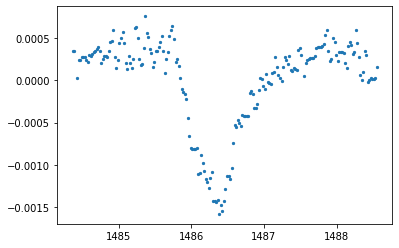

In [6]:
plt.scatter(time,flux,s=5)

In [7]:
i = np.argmax(flux)

In [8]:
lc['TIME'][i]

1485.3665716098037

In [9]:
from scipy.stats import skewnorm

In [10]:
loc = lc['TIME'][i]
scale = (lc['TIME'][-1]-lc['TIME'][0])/3

In [11]:
shape, loc, scale = skewnorm.fit(flux,floc=loc)


In [12]:
fitted_flux = skewnorm.pdf(time, shape, loc=loc, scale=scale)

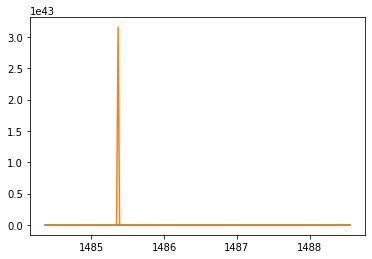

In [13]:
plt.plot(time, flux, label='Original Data')
plt.plot(time, fitted_flux, label='Fitted Skewed Gaussian')

---

## `curve_fit`

#### Revisit Beta Pic Cut Lightcurve

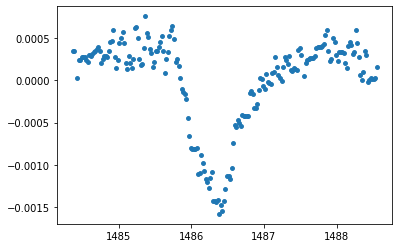

In [14]:
plt.scatter(time,flux,s=15)

In [15]:
flux_err = lc['PDCSAP_FLUX_ERR']
flux_err = flux_err/flux_err.mean()

In [16]:
params, cov = skewed_gaussian_curve_fit2(time,-flux,flux_err)
params2, cov2 = single_gaussian_curve_fit(time,-flux)

1486.3873952988386


In [17]:
params

array([8.53890383e-04, 1.48615678e+03, 3.09692067e-01, 1.33769380e+00])

In [18]:
fit = -skewed_gaussian2(time,*params)
fit2= -gauss(time,*params2)

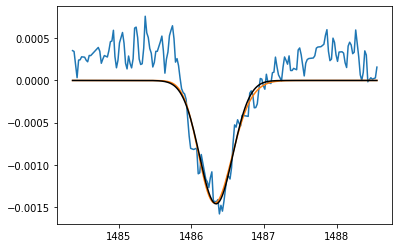

In [19]:
plt.plot(time,flux)
plt.plot(time,fit)
plt.plot(time,fit2,c='black')

In [20]:
import stats_calcs

In [21]:
stats_calcs.chisquare(flux, fit, flux_err)

1.7241865244954345e-05

---
## Test on full lightcurve

In [22]:
lc2, lc_info2 = import_lightcurve('../betapic/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits')

In [23]:
results, _ = processing(lc2,lc_info=lc_info2, method='median', make_plots=True)

TypeError: 'int' object is not subscriptable